# Wrangle and Analyze Data Project

## Importing:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import tweepy 
import os
from twitter_api import get_twitter_data
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Gathering:

In [2]:
# Read Twitter archive
t_arch = pd.read_csv('twitter-archive-enhanced-2.csv')

In [3]:
#Download the URL
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions-3.tsv"
response = requests.get(url)
with open('image-predictions-3.tsv', 'wb') as file:
    file.write(response.content)
    
#Read it
img_pred = pd.read_csv('image_predictions.tsv', sep='\t')


In [4]:
#download data from twitter API 
if not os.path.exists('tweet-json.txt'):
    get_twitter_data(t_arch, 'tweet-json.txt')

#### For the third data source I couldn't extract data via Twitter API, because my account wasn't proposal wasn't accepted. 
#### so i used the tweet-json.txt file.
 

In [5]:
#load tweets data into pandas df
with open('tweet-json.txt') as file:
    t_json = pd.read_json(file, lines= True, encoding = 'utf-8')

## Assessing:

In [6]:
# Veiw Twitter archive
t_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [7]:
t_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [8]:
t_arch[['rating_numerator', 'rating_denominator']].describe()


,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [9]:
t_arch.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [10]:
t_arch.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
            ... 
Stormy         1
Hubertson      1
Sage           1
Glacier        1
Jaycob         1
Name: name, Length: 957, dtype: int64

In [11]:
t_arch.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [12]:
#numerators and denominators columns with invalid values.
t_arch[t_arch['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [13]:
#Invalid names
t_arch[t_arch['name'].apply(len) <= 2 ]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


In [14]:
#Orignal tweets 
t_arch[t_arch['retweeted_status_id'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [15]:
img_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [16]:
img_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
img_pred['jpg_url'].value_counts()

https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg    2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg    2
https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg    2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg    2
                                                  ..
https://pbs.twimg.com/media/CVzkA7-WsAAcXz6.jpg    1
https://pbs.twimg.com/media/CuXSHNnWcAIWEwn.jpg    1
https://pbs.twimg.com/media/CySpCSHXcAAN-qC.jpg    1
https://pbs.twimg.com/media/CuLcNkCXgAEIwK2.jpg    1
https://pbs.twimg.com/media/Crcc7pqXEAAM5O2.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [18]:
t_json

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,2015-11-16 00:24:50+00:00,666049248165822465,666049248165822464,Here we have a 1949 1st generation vulpix. Enj...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666049244999131136, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2350,2015-11-16 00:04:52+00:00,666044226329800704,666044226329800704,This is a purebred Piers Morgan. Loves to Netf...,False,"[0, 137]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666044217047650304, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2351,2015-11-15 23:21:54+00:00,666033412701032449,666033412701032448,Here is a very happy pup. Big fan of well-main...,False,"[0, 130]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666033409081393153, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2352,2015-11-15 23:05:30+00:00,666029285002620928,666029285002620928,This is a western brown Mitsubishi terrier. Up...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666029276303482880, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [19]:
t_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
created_at                       2354 non-null datetime64[ns, UTC]
id                               2354 non-null int64
id_str                           2354 non-null int64
full_text                        2354 non-null object
truncated                        2354 non-null bool
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
source                           2354 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null float64
in_reply_to_screen_name          78 non-null object
user                             2354 non-null object
geo                              0 non-null float64
coordinates                 

## Cleaning
### Fixing quality and issues:
### 
### Quality:
#### 1.filter out the retweets and replies:
#### 2.remove unnecessary columns
#### 3.timestamp: from string to DateTime
#### 4.Correct Numerators and Denominators
#### 5.Clean text
#### 6.remove NaN url rows
#### 7.Remove img_num col from img_pred_clean
#### 8.remove duplicates in img_pred
#### 9.Create image breed prediction and confidence columns 
#### 10.remove unnecessary cols from t_json_clean
#### 11.Create image breed prediction and confidence columns 
#### 12.remove unnecessary cols from t_json_clean


### 
### Tidiness
#### 1.merge ('doggo', 'floofer', 'pupper', 'puppo') into 'dog_stage'
#### 2.compress all columns into one sheet




In [20]:
#copying data
t_json_clean = t_json.copy()
t_arch_clean = t_arch.copy()
img_pred_clean= img_pred.copy()

### Define
#### filter out the retweets and replies:
 - by filtering the Nan using isnull and then clean

### Code

In [21]:
t_arch_clean = t_arch_clean[pd.isnull(t_arch_clean['retweeted_status_user_id'])]
t_arch_clean = t_arch_clean[pd.isnull(t_arch_clean['in_reply_to_user_id'])]


### Test

In [22]:
#check for Null in t_arch_clean
t_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null object
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: float64(4), int64(3), object(10)

### Define
#### remove unnecessary columns:
 - using drop to remove colns

### Code

In [23]:
t_arch_clean = t_arch_clean.drop(["source", "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp"], 1)

### Test

In [24]:
#New list
list(t_arch_clean)

['tweet_id',
 'timestamp',
 'text',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Define
#### merge ('doggo', 'floofer', 'pupper', 'puppo') into 'dog_stage':
 - replace colns with nan to create dog_stage
 - using drop to remove the 4 colns

### Code

In [25]:
#remove "none"
dogs_list = ['doggo', 'floofer', 'pupper', 'puppo']

for col in dogs_list:
    t_arch_clean[col] = t_arch_clean[col].replace('None', np.nan)

In [26]:
#creating dog_stage:
t_arch_clean['dog_stage'] = t_arch_clean[['doggo', 'floofer', 'pupper', 'puppo']].apply(lambda s: ', '.join(s.dropna().astype(str)),axis =1)

t_arch_clean.dog_stage = t_arch_clean.dog_stage.replace('', np.nan).astype('category')

# removing 4 columns:
t_arch_clean = t_arch_clean.drop(columns = ['doggo', 'floofer', 'pupper', 'puppo'], axis =1)


### Test

In [27]:
#Test:
t_arch_clean.info()
t_arch_clean.dog_stage.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null category
dtypes: category(1), int64(3), object(4)
memory usage: 133.5+ KB


pupper            221
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dog_stage, dtype: int64

### Define
#### timestamp: from string to DateTime
 - using date datetime lib

### Code

In [28]:
#convert to DateTime
t_arch_clean.timestamp = pd.to_datetime(t_arch_clean.timestamp)

### Test

In [29]:
t_arch_clean.timestamp.dtypes


datetime64[ns, UTC]

### Define
#### Correct Numerators and Denominators
 - Numerators

### Code

In [30]:
t_arch_clean[t_arch_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/usr/lib/python3/dist-packages/pandas/core/strings.py:1843: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5
695,"This is Logan, the Chow who lived. He solemnly...",75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27
1712,Here we have uncovered an entire battalion of ...,26


In [31]:
new_rate = t_arch_clean[t_arch_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]['text'].str.extract(r"(\d+\.\d*(?=\/\d+))")
new_rate

,0
45,13.5
695,9.75
763,11.27
1712,11.26


In [32]:
t_arch_clean.loc[new_rate.index, 'rating_numerator'] = new_rate.values
t_arch_clean.rating_numerator = t_arch_clean.rating_numerator.astype('float')


### Test

In [33]:
# new ratings view
t_arch_clean.loc[new_rate.index]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
45,883482846933004288,2017-07-08 00:28:19+00:00,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,13.50,10,Bella,NaN
695,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,9.75,10,Logan,NaN
763,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,11.27,10,Sophie,pupper
1712,680494726643068929,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,11.26,10,None,NaN


 - Denominators

### Code

In [34]:
#remove none 10 denominators
t_arch_clean = t_arch_clean[t_arch_clean['rating_denominator'] == 10]

### Test

In [35]:
# test
t_arch_clean[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2080.000000,2080.0
mean,11.656144,10.0
std,39.789764,0.0
min,0.000000,10.0
25%,10.000000,10.0
50%,11.000000,10.0
75%,12.000000,10.0
max,1776.000000,10.0


### Define
#### Clean text
 - by removing rate and link

### Code

In [36]:
t_arch_clean.text = t_arch_clean.text.str.extract('(.+(?=\s\d+/\d+\s))')


### Test

In [37]:
t_arch_clean.text.sample(5)


1476               This pupper is afraid of its own feet.
2129    This is Sandra. She's going skydiving. Nice ad...
242     This is Vixen. He really likes bananas. Steals...
927     This is Winnie. She's not a fan of the fast mo...
2297    Here is Dave. He is actually just a skinny leg...
Name: text, dtype: object

### Define
#### remove NaN url rows
 - using loc

### Code

In [38]:
t_arch_clean = t_arch_clean.loc[~t_arch_clean.expanded_urls.isnull()]


### Test

In [39]:
t_arch_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2077 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2077 non-null int64
timestamp             2077 non-null datetime64[ns, UTC]
text                  2010 non-null object
expanded_urls         2077 non-null object
rating_numerator      2077 non-null float64
rating_denominator    2077 non-null int64
name                  2077 non-null object
dog_stage             335 non-null category
dtypes: category(1), datetime64[ns, UTC](1), float64(1), int64(2), object(3)
memory usage: 132.2+ KB


### Define
#### Remove img_num col from img_pred_clean

### Code

In [40]:
img_pred_clean.drop('img_num', axis=1, inplace=True)


### Test

In [41]:
img_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 135.9+ KB


### Define
#### remove duplicates in img_pred

### Code

In [42]:
img_pred_clean = img_pred_clean.drop_duplicates(subset=['jpg_url'], keep='last')

### Test

In [43]:
sum(img_pred_clean['jpg_url'].duplicated())

0

### Define
#### Create image breed prediction and confidence columns 

### Code

In [44]:
dog_breed = []
conf_list = []

#fn of gog breed and confidence level for predicition
def image(img_pred_clean):
    if img_pred_clean['p1_dog'] == True:
        dog_breed.append(img_pred_clean['p1'])
        conf_list.append(img_pred_clean['p1_conf'])
    elif img_pred_clean['p2_dog'] == True:
        dog_breed.append(img_pred_clean['p2'])
        conf_list.append(img_pred_clean['p2_conf'])
    elif img_pred_clean['p3_dog'] == True:
        dog_breed.append(img_pred_clean['p3'])
        conf_list.append(img_pred_clean['p3_conf'])
    else:
        dog_breed.append('Error')
        conf_list.append('Error')

img_pred_clean.apply(image, axis=1)

#new cols
img_pred_clean['dog_breed'] = dog_breed
img_pred_clean['confidence'] = conf_list

In [45]:
#remove errors
img_pred_clean = img_pred_clean[img_pred_clean['dog_breed'] != 'Error']

In [46]:
#keep important clos only
img_pred_clean = img_pred_clean[['tweet_id', 'jpg_url', 'dog_breed', 'confidence']]


### Test

In [47]:
#veiw
img_pred_clean.info()
img_pred_clean.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id      1691 non-null int64
jpg_url       1691 non-null object
dog_breed     1691 non-null object
confidence    1691 non-null object
dtypes: int64(1), object(3)
memory usage: 66.1+ KB


,tweet_id,jpg_url,dog_breed,confidence
517,676440007570247681,https://pbs.twimg.com/media/CWMyl9EWUAAnZJ0.jpg,Maltese_dog,0.579472
1724,819952236453363712,https://pbs.twimg.com/media/C2EONHNWQAUWxkP.jpg,American_Staffordshire_terrier,0.925505
495,675740360753160193,https://pbs.twimg.com/ext_tw_video_thumb/67574...,golden_retriever,0.800495
1168,735991953473572864,https://pbs.twimg.com/media/CjbExRKUoAAs089.jpg,cocker_spaniel,0.961643
1480,780858289093574656,https://pbs.twimg.com/media/CtYqeNHWgAATqYZ.jpg,Chesapeake_Bay_retriever,0.488555
1361,761227390836215808,https://pbs.twimg.com/media/CpBsRleW8AEfO8G.jpg,French_bulldog,0.280802
158,668872652652679168,https://pbs.twimg.com/media/CUhQIAhXAAA2j7u.jpg,miniature_schnauzer,0.0355366
979,707297311098011648,https://pbs.twimg.com/media/CdDTJLMW4AEST--.jpg,Blenheim_spaniel,0.370717
1990,873213775632977920,https://pbs.twimg.com/media/DB5HTBGXUAE0TiK.jpg,vizsla,0.619782
1450,776218204058357768,https://pbs.twimg.com/media/CsWuVEdWcAAqbe9.jpg,Samoyed,0.940326


### Define
#### remove unnecessary cols from t_json_clean

### Code

In [48]:
#first veiw it
t_json_clean.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'truncated',
       'display_text_range', 'entities', 'extended_entities', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive',
       'possibly_sensitive_appealable', 'lang', 'retweeted_status',
       'quoted_status_id', 'quoted_status_id_str', 'quoted_status'],
      dtype='object')

In [49]:
#keeping the 3 main colns
t_json_clean = t_json_clean[['id', 'retweet_count', 'favorite_count']]
#changing 1st col name
t_json_clean.columns = ['tweet_id', 'retweet_count', 'favorite_count']


### Test

In [50]:
t_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


### Define
#### compress all columns into one sheet
#### twitter_archive_master.csv (combined and cleaned data)

### Code

In [51]:
t_arch_1 = pd.merge(t_arch_clean, 
                      img_pred_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
t_arch_1 = t_arch_1[t_arch_1['jpg_url'].notnull()]

t_arch_new = pd.merge(t_arch_1, t_json_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
t_arch_new.drop(t_arch_new.columns[t_arch_new.columns.str.contains('Unnamed',case = False)],axis = 1)
t_arch_new.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

t_arch_final = pd.read_csv('twitter_archive_master.csv')


### Test

In [52]:
t_arch_final

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,3261,20562
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1585,666049248165822465,2015-11-16 00:24:50+00:00,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5.0,10,None,NaN,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,41,111
1586,666044226329800704,2015-11-16 00:04:52+00:00,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6.0,10,a,NaN,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,147,311
1587,666033412701032449,2015-11-15 23:21:54+00:00,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9.0,10,a,NaN,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,47,128
1588,666029285002620928,2015-11-15 23:05:30+00:00,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7.0,10,a,NaN,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,48,132


## Insights and Visualizations

In [53]:
t_arch_final.info()
t_arch_final.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1590 entries, 0 to 1589
Data columns (total 13 columns):
tweet_id              1590 non-null int64
timestamp             1590 non-null object
text                  1534 non-null object
expanded_urls         1590 non-null object
rating_numerator      1590 non-null float64
rating_denominator    1590 non-null int64
name                  1590 non-null object
dog_stage             248 non-null object
jpg_url               1590 non-null object
dog_breed             1590 non-null object
confidence            1590 non-null float64
retweet_count         1590 non-null int64
favorite_count        1590 non-null int64
dtypes: float64(2), int64(4), object(7)
memory usage: 161.6+ KB


,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,dog_breed,confidence,retweet_count,favorite_count
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,4328,25461
2,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal.,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,8964,42908
3,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,9774,41048
4,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,None,NaN,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,3261,20562


In [54]:
t_arch_final.describe()

,tweet_id,rating_numerator,rating_denominator,confidence,retweet_count,favorite_count
count,1.590000e+03,1590.000000,1590.0,1590.000000,1590.000000,1590.000000
mean,7.388721e+17,10.784138,10.0,0.551393,2568.962264,8673.791824
std,6.850374e+16,1.785697,0.0,0.299671,4329.257286,11792.694419
min,6.660209e+17,0.000000,10.0,0.000010,16.000000,81.000000
25%,6.769623e+17,10.000000,10.0,0.305025,620.250000,2079.000000
50%,7.115483e+17,11.000000,10.0,0.550749,1367.000000,4173.500000
75%,7.931921e+17,12.000000,10.0,0.823252,3017.000000,10941.500000
max,8.921774e+17,14.000000,10.0,0.999956,79515.000000,132810.000000


### 1. Most common Rating

In [55]:
t_arch_final['rating_numerator'].value_counts()

12.00    402
10.00    351
11.00    338
13.00    203
9.00     131
8.00      68
7.00      31
14.00     19
6.00      16
5.00      13
4.00       6
3.00       5
2.00       2
13.50      1
11.27      1
0.00       1
11.26      1
9.75       1
Name: rating_numerator, dtype: int64

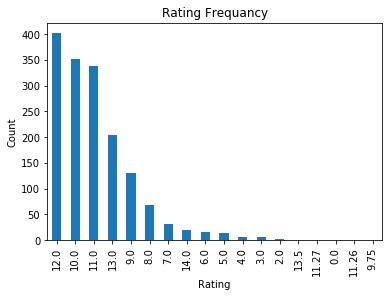

In [56]:
rating_freq = t_arch_final.groupby('rating_numerator').filter(lambda x: True)

rating_freq['rating_numerator'].value_counts().plot(kind = 'bar')
plt.title('Rating Frequancy')
plt.xlabel('Rating')
plt.ylabel('Count')

plt.savefig('Rating_Frequancy.png',bbox_inches='tight');


### 2. Relation between Retweets and Ratings

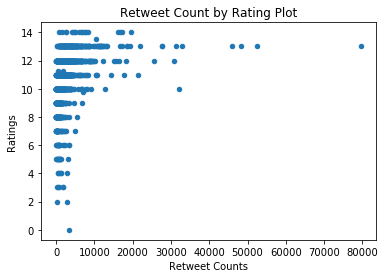

In [57]:
t_arch_final.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Count by Rating Plot')

plt.savefig('Retweet_vs_Rating.png',bbox_inches='tight');

### 3. Most common Dog Breed

In [58]:
t_arch_final['dog_breed'].value_counts()

golden_retriever        138
Labrador_retriever       98
Pembroke                 93
Chihuahua                85
pug                      60
                       ... 
clumber                   1
Irish_wolfhound           1
Bouvier_des_Flandres      1
silky_terrier             1
Japanese_spaniel          1
Name: dog_breed, Length: 113, dtype: int64

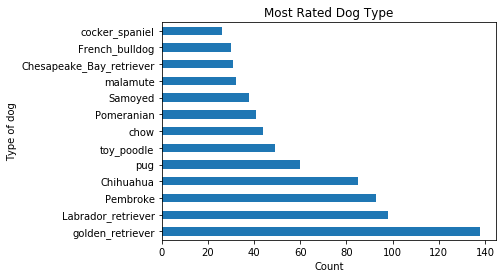

In [59]:
dog_breed = t_arch_final.groupby('dog_breed').filter(lambda x: len(x) >= 25)

dog_breed['dog_breed'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')
 
plt.gcf().savefig('loved_dogs.png',bbox_inches='tight');